# Perfil de temperatua unidimensional em uma barra
Usando método dos volumes finitos

- Condição de contorno
   1. Taxa térmica constante na face esquerda ($q_{sup}''=1000\frac{W}{m^2}$)
   2. Temperatura de superfície constante na face direita ($T_{sup} = 20$)

## Para os pontos internos

\begin{align}
a_P T_P &= a_E T_E + a_W T_W + b\\
a_E &= \left. \frac{kA}{\Delta x} \right|_e\\
a_W &= \left. \frac{kA}{\Delta x} \right|_w\\
a_P &= a_E + a_W - S_P A \Delta x\\
b &= S_C A \Delta x
\end{align}

## Para os pontos internos

### Face da esquerda

\begin{align}
a_P T_P &= a_E T_E + b\\
a_E &= \left. \frac{kA}{\Delta x} \right|_e\\
a_P &= a_E - S_P A \Delta x\\
b &= S_C A \Delta x + q''_{sup} A
\end{align}

### Face da direita

\begin{align}
a_P T_P &= a_E T_E + b\\
a_E &= \left. \frac{kA}{\Delta x} \right|_e\\
a_P &= a_E + \left. \frac{kA}{\Delta x/2} \right|_w - S_P A \Delta x\\
b &= S_C A \Delta x + \left. \frac{kA}{\Delta x/2} \right|_w T_{pres}
\end{align}

In [2]:
from numpy import array, matmul
from numpy.linalg import inv

In [3]:
# *Dados
K = 1 #W/mK
S = 0 #W/m3
A = 1 #m2
Q_SUP = 1000 #W/m2
T_PRES = 20+273.15 #K
DX = 0.04 #m

In [4]:
coef_mtx = array(
    [[K*A/DX, -K*A/DX, 0],
     [-K*A/DX, 2*K*A/DX, -K*A/DX],
     [0, -K*A/DX, K*A/DX + K*A/(DX/2)]]
)

rslt_mtx = array(
    [[Q_SUP*A],
     [0],
     [K*A/(DX/2)*T_PRES]]
)

In [5]:
from seaborn import heatmap
import matplotlib.pyplot as plt

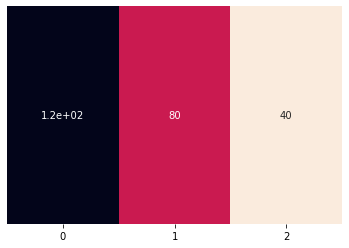

In [6]:
barra = (matmul(inv(coef_mtx), rslt_mtx) - 273.15).T
heatmap(barra, cbar=False, annot=True, cmap='rocket_r')
plt.gca().get_yaxis().set_visible(False)

## Fazendo o problema para mais pontos

In [7]:
import numpy as np

In [8]:
# *Dados
K = 1 #W/mK
S = 0 #W/m3
A = 1 #m2
Q_SUP = 1000 #W/m2
T_PRES = 20+273.15 #K
DX = 0.12/7 #m

In [9]:
coef_mtx = array(
    [[K*A/DX, -K*A/DX, 0, 0, 0, 0, 0],
     [-K*A/DX, 2*K*A/DX, -K*A/DX, 0, 0, 0, 0],
     [0, -K*A/DX, 2*K*A/DX, -K*A/DX, 0, 0, 0],
     [0, 0, -K*A/DX, 2*K*A/DX, -K*A/DX, 0, 0],
     [0, 0, 0, -K*A/DX, 2*K*A/DX, -K*A/DX, 0],
     [0, 0, 0, 0, -K*A/DX, 2*K*A/DX, -K*A/DX],
     [0, 0, 0, 0, 0, -K*A/DX, K*A/DX + K*A/(DX/2)]]
)

rslt_mtx = array(
    [[Q_SUP*A],
     [0],
     [0],
     [0],
     [0],
     [0],
     [K*A/(DX/2)*T_PRES]]
)

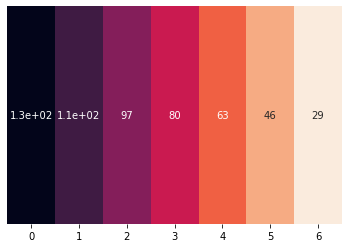

In [12]:
barra = (matmul(inv(coef_mtx), rslt_mtx) - 273.15).T
heatmap(barra, cbar=False, annot=True, cmap='rocket_r')
plt.gca().get_yaxis().set_visible(False)

In [11]:
barra

array([[131.42857143],
       [114.28571429],
       [ 97.14285714],
       [ 80.        ],
       [ 62.85714286],
       [ 45.71428571],
       [ 28.57142857]])